<a href="https://colab.research.google.com/github/AshishG-08/Coursera-test/blob/main/DL1-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

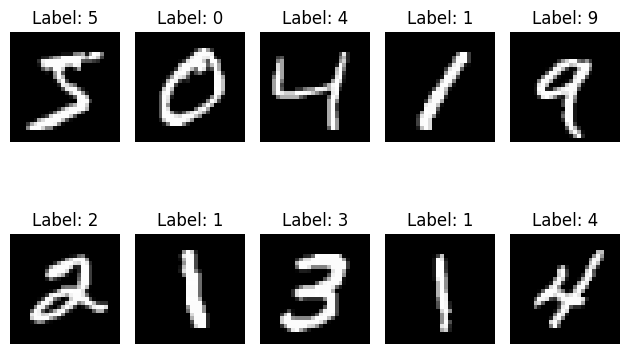

In [15]:

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8623 - loss: 0.4682 - val_accuracy: 0.9604 - val_loss: 0.1318
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9647 - loss: 0.1191 - val_accuracy: 0.9672 - val_loss: 0.1103
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9757 - loss: 0.0774 - val_accuracy: 0.9692 - val_loss: 0.1034
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9825 - loss: 0.0551 - val_accuracy: 0.9681 - val_loss: 0.1137
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9865 - loss: 0.0435 - val_accuracy: 0.9752 - val_loss: 0.0851


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9716 - loss: 0.0945
Test Accuracy: 0.98


In [9]:
y_pred = np.argmax(model.predict(x_test), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
print(confusion_matrix(y_test, y_pred))

[[ 970    1    0    0    0    0    3    0    3    3]
 [   2 1123    3    1    0    0    3    0    3    0]
 [   5    1 1013    1    0    0    2    6    3    1]
 [   1    0    6  988    0    4    0    4    4    3]
 [   2    1    7    0  957    0    3    3    2    7]
 [   4    0    0   10    0  866    4    1    5    2]
 [   5    2    2    1    5    4  937    0    2    0]
 [   1    8    9    2    3    0    0  998    2    5]
 [   6    0    5    6    6    2    0    3  943    3]
 [   4    8    1    7    7    3    1    6    8  964]]


In [11]:
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
df = sns.load_dataset("iris")

In [18]:
print("Dataset Preview:")
print(df.head())

# Check for missing values and dataset info
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [19]:
df.to_csv("iris_dataset.csv", index=False)
print("\nDataset saved to 'iris_dataset.csv'")


Dataset saved to 'iris_dataset.csv'


In [20]:
loaded_df = pd.read_csv("iris_dataset.csv")
print("\nReloaded Dataset Preview:")
print(loaded_df.head())


Reloaded Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa



Visualizing feature combinations...


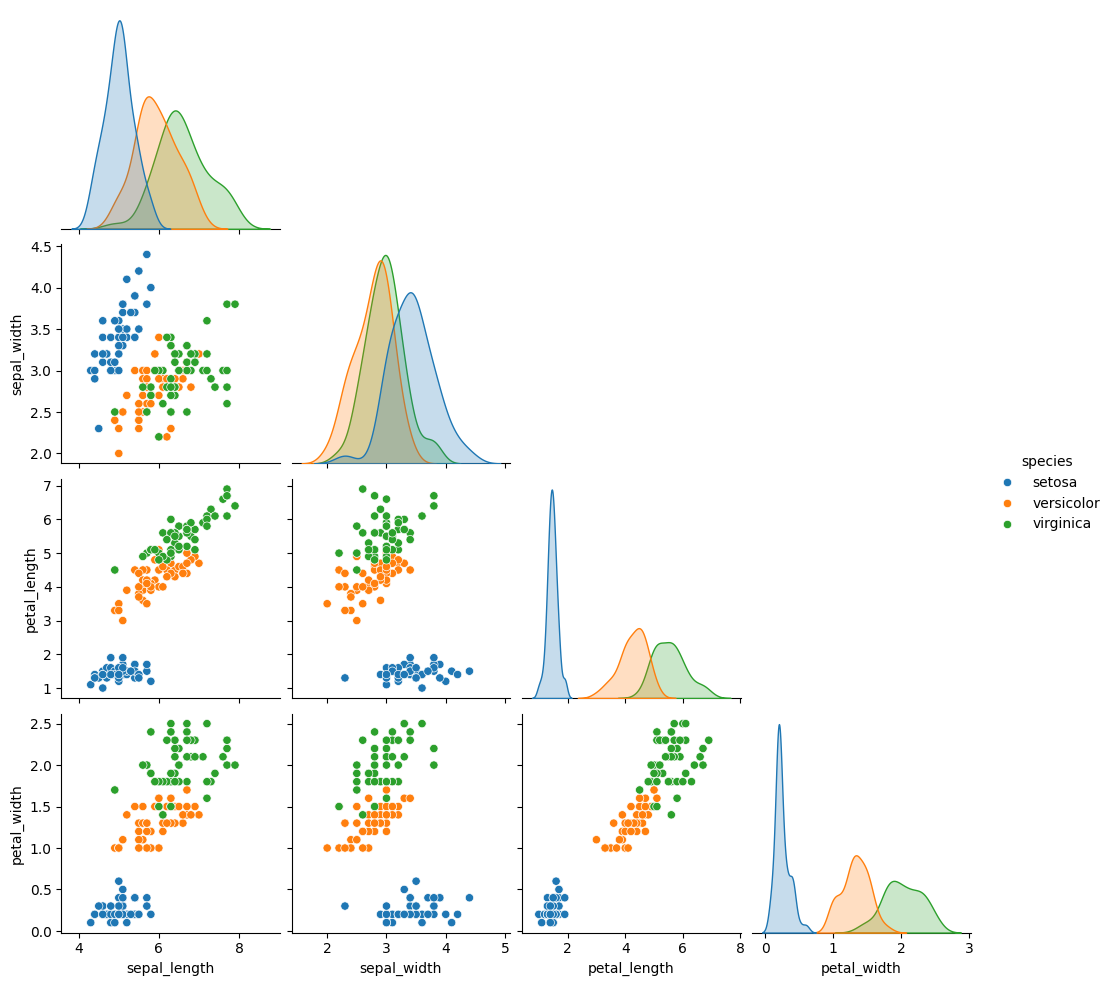

In [21]:
print("\nVisualizing feature combinations...")
sns.pairplot(df, hue="species", diag_kind="kde", corner=True)
plt.show()

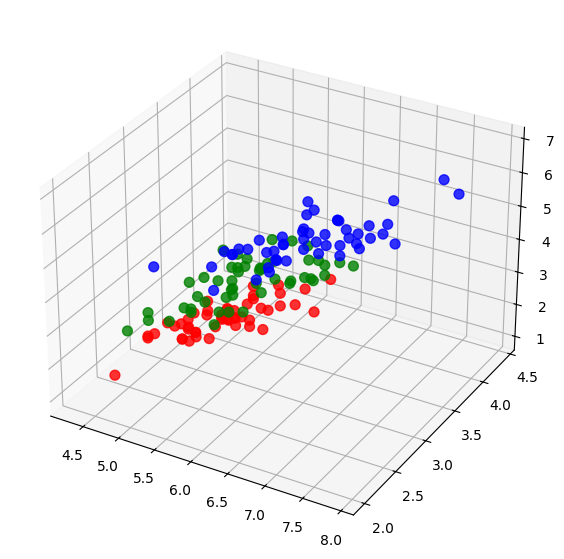

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use three numeric features for the plot
x = df["sepal_length"]
y = df["sepal_width"]
z = df["petal_length"]
colors = {"setosa": "r", "versicolor": "g", "virginica": "b"}
c = df["species"].map(colors)

# Create the 3D scatter plot
scatter = ax.scatter(x, y, z, c=c, label=df["species"], s=50, alpha=0.8)

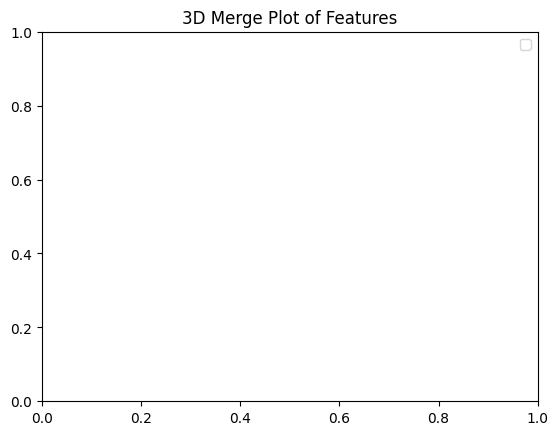

In [23]:
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
plt.title("3D Merge Plot of Features")
plt.legend(colors.keys())
plt.show()

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

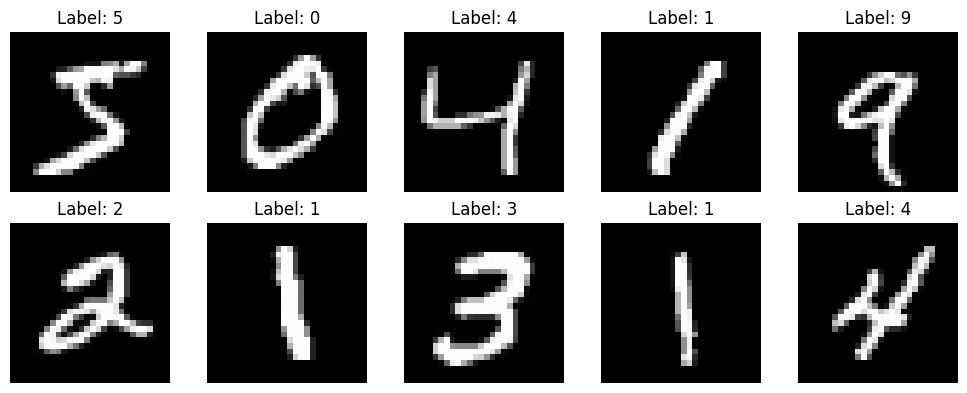

In [25]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
def create_mlp(learning_rate=0.001, optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(256, activation=activation),
        Dropout(dropout_rate),
        Dense(128, activation=activation),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')  # Output layer for classification
    ])
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer.")

    # Compile the model
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [31]:
learning_rates = [0.01, 0.001, 0.0001]
activations = ['relu', 'tanh']
dropout_rates = [0.0, 0.2]

for lr in learning_rates:
    for act in activations:
        for dr in dropout_rates:
            print(f"\nTraining with LR={lr}, Activation={act}, Dropout={dr}...")
            model = create_mlp(learning_rate=lr, activation=act, dropout_rate=dr)
            history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=32)


Training with LR=0.01, Activation=relu, Dropout=0.0...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8830 - loss: 0.3965 - val_accuracy: 0.9480 - val_loss: 0.1875
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9493 - loss: 0.1835 - val_accuracy: 0.9491 - val_loss: 0.1807
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9570 - loss: 0.1624 - val_accuracy: 0.9556 - val_loss: 0.1708

Training with LR=0.01, Activation=relu, Dropout=0.2...
Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8369 - loss: 0.5428 - val_accuracy: 0.9306 - val_loss: 0.2610
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9081 - loss: 0.3443 - val_accuracy: 0.9418 - val_loss: 0.2437
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9199 - loss: 0.3183 - val_accuracy: 0.9484 - val_loss: 0.2113

Training with LR=0.01, Activation=tanh, Dropout=0.0...
Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8604 - loss: 0.4596 - val_accuracy: 0.9163 - v


Handling Gradient Problems...
Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8857 - loss: 0.3944 - val_accuracy: 0.9585 - val_loss: 0.1326
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9679 - loss: 0.1021 - val_accuracy: 0.9649 - val_loss: 0.1157
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9806 - loss: 0.0624 - val_accuracy: 0.9682 - val_loss: 0.1005
Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8864 - loss: 0.3917 - val_accuracy: 0.9638 - val_loss: 0.1217
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9722 - loss: 0.0904 - val_accuracy: 0.9679 - val_loss: 0.1033
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9828 - loss: 0.0558 - val_accuracy: 0.9702 - val_loss: 0.1063


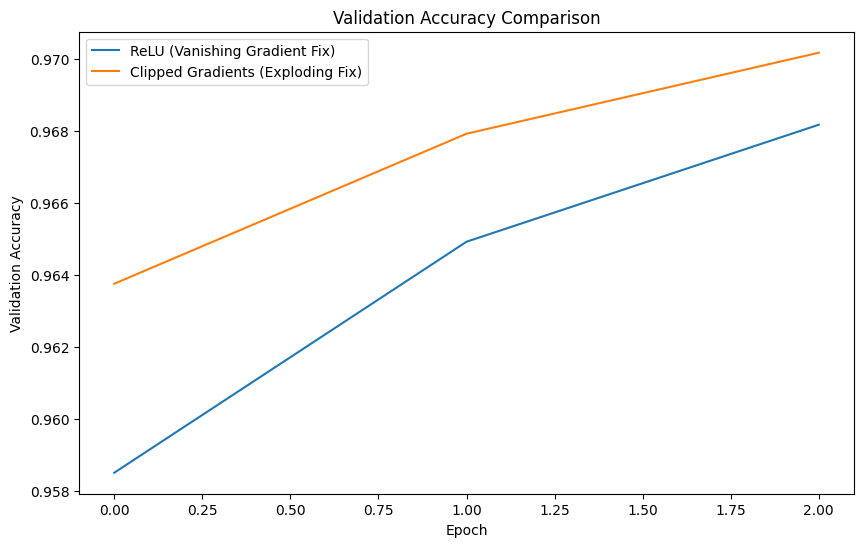

In [32]:
print("\nHandling Gradient Problems...")

# Using ReLU to address vanishing gradients
relu_model = create_mlp(activation='relu')
relu_history = relu_model.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=32)

# Applying gradient clipping for exploding gradients
clip_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)  # Clip gradients to avoid explosion
clipped_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
clipped_model.compile(optimizer=clip_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
clipped_history = clipped_model.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=32)

# Compare results of different approaches
plt.figure(figsize=(10, 6))
plt.plot(relu_history.history['val_accuracy'], label='ReLU (Vanishing Gradient Fix)')
plt.plot(clipped_history.history['val_accuracy'], label='Clipped Gradients (Exploding Fix)')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10  # Example dataset (contains faces in 'automobile' and 'human' images)
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load dataset (CIFAR-10 for demonstration)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [34]:
selected_classes = [3, 5]
train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

x_train, y_train = x_train[train_mask.squeeze()], y_train[train_mask].squeeze()
x_test, y_test = x_test[test_mask.squeeze()], y_test[test_mask].squeeze()

# Relabel the classes for binary classification
y_train = (y_train == 5).astype(int)
y_test = (y_test == 5).astype(int)

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

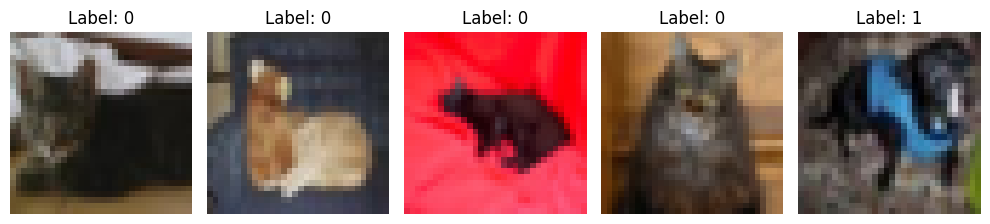

In [35]:
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [36]:
def create_cnn(filters=32, kernel_size=(3, 3), dropout_rate=0.0, learning_rate=0.001):
    model = Sequential([
        Conv2D(filters, kernel_size, activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),
        Conv2D(filters * 2, kernel_size, activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [37]:
# Train and evaluate with different hyperparameters
filters = [32, 64]
dropout_rates = [0.0, 0.25]
learning_rates = [0.001, 0.0001]

for f in filters:
    for dr in dropout_rates:
        for lr in learning_rates:
            print(f"\nTraining with Filters={f}, Dropout={dr}, Learning Rate={lr}...")
            cnn_model = create_cnn(filters=f, dropout_rate=dr, learning_rate=lr)
            history = cnn_model.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=32, verbose=1)
            test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=0)
            print(f"Test Accuracy: {test_acc:.2f}")

# Visualization of the impact of hyperparameters
print("\nImpact of Hyperparameter Tuning:")
print("- Increasing filters improves feature detection but adds computational cost.")
print("- Dropout helps prevent overfitting but may slightly reduce performance.")
print("- Lower learning rates stabilize training but require more epochs to converge.")


Training with Filters=32, Dropout=0.0, Learning Rate=0.001...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.5753 - loss: 0.6750 - val_accuracy: 0.6795 - val_loss: 0.6109
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.6864 - loss: 0.5974 - val_accuracy: 0.6840 - val_loss: 0.5914
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.7188 - loss: 0.5493 - val_accuracy: 0.7055 - val_loss: 0.5726
Test Accuracy: 0.73

Training with Filters=32, Dropout=0.0, Learning Rate=0.0001...
Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.5395 - loss: 0.6864 - val_accuracy: 0.6085 - val_loss: 0.6731
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.6057 - loss: 0.6597 - val_accuracy: 0.6335 - val_loss: 0.6501
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.6311 - loss: 0.6416 - val_accuracy: 0.6425 - val_loss: 0.6323
Test Accuracy: 0.62

Training with Filters=32, Dropout=0.25, Learning Rate=0.001...
Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - acc